In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
# !apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# 한글 폰트 설정하기
# fontpath = 'E:\Tag_Extract\code\fonts\truetype\nanum\NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=10)
# plt.rc('font', family='NanumBarunGothic')
# matplotlib.font_manager._rebuild()

In [2]:
# 필요한 라이브러리 설치하기
# !git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...


In [5]:
# !pip install split-folders[full] 
#progress-bar까지 보여주는 데이터 분리 모듈

     ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00


In [6]:
import splitfolders

#train/val/test 나누기
#ratio 파라미터에 원하는 (train, validation, test) 비율 입력 (ex: 0.8, 0.1, 0.1)
dataset_path = r'E:\NRF_2022\MDPI\Tag_Extract\data\Classification_Merge'
dataset_split_path = r'E:\NRF_2022\MDPI\Tag_Extract\data\Classification_Merge_Split2'
splitfolders.ratio(dataset_path, output=dataset_split_path, seed=1337, ratio=(0.8, 0.1, 0.1)) # default seed:1337

Copying files: 933 files [00:11, 82.25 files/s] 


In [ ]:
"""
import os
import shutil


directory_list = [
    '/content/drive/MyDrive/NGN/movie_trailer_result/Classification_Code/train/',
    '/content/drive/MyDrive/NGN/movie_trailer_result/Classification_Code/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    path = '/content/drive/MyDrive/NGN/movie_trailer_result/Classification_Test/' + query
    for file_name in os.listdir(path):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')

            #shutil.move('/content/drive/MyDrive/NGN/movie_trailer_result/Classification_Test/'+ query + '/' + file_name, '/content/drive/MyDrive/NGN/movie_trailer_result/Classification_Code/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move('/content/drive/MyDrive/NGN/movie_trailer_result/Classification_Test/'+query + '/' + file_name, '/content/drive/MyDrive/NGN/movie_trailer_result/Classification_Code/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(path)
    """

In [ ]:
# test data와 train 데이터로 분류
"""query = 'Action'
dataset_split(query, 30)

query = 'Adventure'
dataset_split(query, 30)

query = 'Animation'
dataset_split(query, 30)

query = 'Biography'
dataset_split(query, 30)

query = 'Comedy'
dataset_split(query, 30)

query = 'Crime'
dataset_split(query, 30)

query = 'Documentary'
dataset_split(query, 30)

query = 'Drama'
dataset_split(query, 30)

query = 'Family'
dataset_split(query, 30)

query = 'Fantasy'
dataset_split(query, 30)

query = 'History'
dataset_split(query, 30)

query = 'Horror'
dataset_split(query, 30)

query = 'Mistery'
dataset_split(query, 30)

query = 'Music'
dataset_split(query, 30)

query = 'Romance'
dataset_split(query, 30)

query = 'Sci-Fi'
dataset_split(query, 30)

query = 'Sport'
dataset_split(query, 30)

query = 'Thriller'
dataset_split(query, 30)

query = 'War'
dataset_split(query, 30)

query = 'Western'
dataset_split(query, 30)
"""

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [2]:
import os
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
# data 수가 적은 Animation, Documentary, Sport,War, Western는 삭제.
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation) 좌우반전
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 평범한 이미지의 경우 이 값으로 표준화
])

data_dir = r'E:\NRF_2022\MDPI\Tag_Extract\data\Classification_Merge_Split2'
# try :
#   os.remove(r'/content/drive/MyDrive/NGN/movie_trailer_result/Classification_Code/dataset/train/.ipynb_checkpoints')
#   os.remove(r'/content/drive/MyDrive/NGN/movie_trailer_result/Classification_Code/dataset/test/.ipynb_checkpoints')
# except:
#     pass

train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)


train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=16, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=16, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
#print('validation 데이터셋 크기:', len(val_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 744
테스트 데이터셋 크기: 98
클래스: ['Action', 'Comedy', 'Crime', 'Drama', 'Horror', 'Romance']


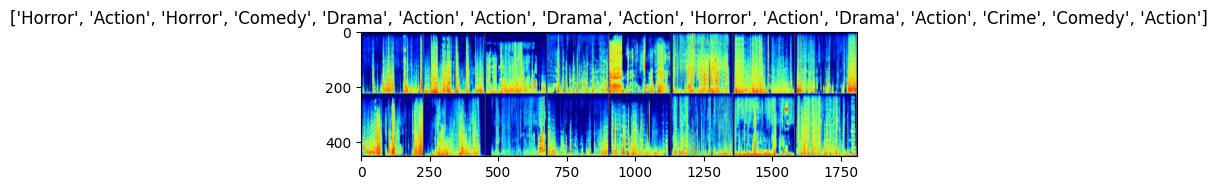

In [4]:
import matplotlib
import matplotlib.pyplot as plt

def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [5]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 21개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 6)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\NGN/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [6]:
num_epochs = 1000
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.7767 Acc: 22.8495% Time: 20.5609s
#1 Loss: 1.5482 Acc: 39.1129% Time: 34.4423s
#2 Loss: 1.3697 Acc: 47.9839% Time: 47.9994s
#3 Loss: 1.0479 Acc: 64.3817% Time: 61.6210s
#4 Loss: 0.7998 Acc: 72.1774% Time: 75.0700s
#5 Loss: 0.6895 Acc: 79.3011% Time: 88.7882s
#6 Loss: 0.6607 Acc: 79.1667% Time: 102.3070s
#7 Loss: 0.4813 Acc: 86.6936% Time: 116.1359s
#8 Loss: 0.3373 Acc: 90.4570% Time: 129.9883s
#9 Loss: 0.2912 Acc: 93.0107% Time: 143.9588s
#10 Loss: 0.2859 Acc: 91.6667% Time: 157.8274s
#11 Loss: 0.2341 Acc: 93.4140% Time: 171.6799s
#12 Loss: 0.2190 Acc: 93.6828% Time: 185.1998s
#13 Loss: 0.2296 Acc: 91.5323% Time: 199.0287s
#14 Loss: 0.2080 Acc: 92.3387% Time: 212.9046s
#15 Loss: 0.1676 Acc: 93.6828% Time: 226.3814s
#16 Loss: 0.1806 Acc: 92.4731% Time: 240.1405s
#17 Loss: 0.1588 Acc: 93.6828% Time: 253.9360s
#18 Loss: 0.1302 Acc: 93.9516% Time: 267.5317s
#19 Loss: 0.1326 Acc: 94.3548% Time: 281.2197s
#20 Loss: 0.1334 Acc: 94.2204% Time: 294.8030s
#21 Loss: 0.1207 Acc: 94.0860

#172 Loss: 0.0896 Acc: 94.0860% Time: 2375.6643s
#173 Loss: 0.0856 Acc: 93.9516% Time: 2389.5072s
#174 Loss: 0.0805 Acc: 95.6989% Time: 2402.9609s
#175 Loss: 0.0865 Acc: 94.3548% Time: 2416.3427s
#176 Loss: 0.0835 Acc: 94.3548% Time: 2429.8783s
#177 Loss: 0.0697 Acc: 96.1021% Time: 2443.5335s
#178 Loss: 0.0722 Acc: 94.4893% Time: 2456.9860s
#179 Loss: 0.0740 Acc: 94.2204% Time: 2470.4092s
#180 Loss: 0.0742 Acc: 94.8925% Time: 2484.1088s
#181 Loss: 0.0705 Acc: 96.2366% Time: 2497.7553s
#182 Loss: 0.0729 Acc: 94.8925% Time: 2511.4679s
#183 Loss: 0.0710 Acc: 95.6989% Time: 2525.3311s
#184 Loss: 0.0710 Acc: 95.2957% Time: 2538.7960s
#185 Loss: 0.0676 Acc: 95.9677% Time: 2552.4562s
#186 Loss: 0.0744 Acc: 94.6237% Time: 2565.9544s
#187 Loss: 0.0722 Acc: 94.4893% Time: 2579.6857s
#188 Loss: 0.0721 Acc: 94.4893% Time: 2593.4469s
#189 Loss: 0.0736 Acc: 94.7581% Time: 2607.3360s
#190 Loss: 0.0739 Acc: 94.4893% Time: 2620.8531s
#191 Loss: 0.0696 Acc: 95.1613% Time: 2634.3304s
#192 Loss: 0.0852 Ac

#340 Loss: 0.0719 Acc: 93.8172% Time: 4665.7365s
#341 Loss: 0.0682 Acc: 95.1613% Time: 4679.2433s
#342 Loss: 0.0695 Acc: 95.0269% Time: 4692.7624s
#343 Loss: 0.0686 Acc: 95.4301% Time: 4706.3013s
#344 Loss: 0.0823 Acc: 93.8172% Time: 4719.8153s
#345 Loss: 0.0801 Acc: 95.2957% Time: 4733.6357s
#346 Loss: 0.0802 Acc: 94.3548% Time: 4747.0176s
#347 Loss: 0.0870 Acc: 94.2204% Time: 4760.8298s
#348 Loss: 0.0756 Acc: 94.0860% Time: 4774.4277s
#349 Loss: 0.0718 Acc: 94.8925% Time: 4788.1772s
#350 Loss: 0.0796 Acc: 93.6828% Time: 4801.8529s
#351 Loss: 0.0746 Acc: 95.0269% Time: 4815.3682s
#352 Loss: 0.0684 Acc: 94.3548% Time: 4828.9456s
#353 Loss: 0.0726 Acc: 95.0269% Time: 4842.5932s
#354 Loss: 0.0702 Acc: 95.1613% Time: 4856.0002s
#355 Loss: 0.0731 Acc: 94.8925% Time: 4869.5249s
#356 Loss: 0.0718 Acc: 95.5645% Time: 4883.5321s
#357 Loss: 0.0832 Acc: 94.2204% Time: 4897.1222s
#358 Loss: 0.0704 Acc: 94.7581% Time: 4910.6233s
#359 Loss: 0.0720 Acc: 95.4301% Time: 4924.2658s
#360 Loss: 0.0866 Ac

#508 Loss: 0.0631 Acc: 95.1613% Time: 6958.1779s
#509 Loss: 0.0673 Acc: 94.2204% Time: 6971.7578s
#510 Loss: 0.0658 Acc: 95.0269% Time: 6985.3811s
#511 Loss: 0.0686 Acc: 94.7581% Time: 6999.0219s
#512 Loss: 0.0685 Acc: 94.6237% Time: 7012.6516s
#513 Loss: 0.0651 Acc: 95.6989% Time: 7026.3457s
#514 Loss: 0.0654 Acc: 94.4893% Time: 7040.1595s
#515 Loss: 0.0661 Acc: 94.6237% Time: 7053.6498s
#516 Loss: 0.0644 Acc: 95.4301% Time: 7067.1153s
#517 Loss: 0.0654 Acc: 95.2957% Time: 7080.6928s
#518 Loss: 0.0663 Acc: 94.6237% Time: 7094.1348s
#519 Loss: 0.0659 Acc: 94.7581% Time: 7107.5900s
#520 Loss: 0.0663 Acc: 94.4893% Time: 7120.9761s
#521 Loss: 0.0695 Acc: 94.0860% Time: 7134.7296s
#522 Loss: 0.0652 Acc: 95.1613% Time: 7148.4191s
#523 Loss: 0.0655 Acc: 95.0269% Time: 7162.1712s
#524 Loss: 0.0657 Acc: 94.4893% Time: 7175.9114s
#525 Loss: 0.0672 Acc: 94.6237% Time: 7189.7497s
#526 Loss: 0.0666 Acc: 94.8925% Time: 7203.2712s
#527 Loss: 0.0669 Acc: 95.2957% Time: 7216.7426s
#528 Loss: 0.0667 Ac

#676 Loss: 0.0637 Acc: 95.4301% Time: 9244.1135s
#677 Loss: 0.0661 Acc: 94.4893% Time: 9257.9568s
#678 Loss: 0.0742 Acc: 94.4893% Time: 9271.5652s
#679 Loss: 0.0646 Acc: 95.1613% Time: 9285.0266s
#680 Loss: 0.0679 Acc: 94.4893% Time: 9298.7120s
#681 Loss: 0.0654 Acc: 95.0269% Time: 9312.3800s
#682 Loss: 0.0639 Acc: 95.5645% Time: 9326.1297s
#683 Loss: 0.0667 Acc: 94.7581% Time: 9339.6089s
#684 Loss: 0.0692 Acc: 93.9516% Time: 9353.3212s
#685 Loss: 0.0648 Acc: 95.2957% Time: 9367.2256s
#686 Loss: 0.0664 Acc: 94.6237% Time: 9380.9288s
#687 Loss: 0.0695 Acc: 93.9516% Time: 9394.6238s
#688 Loss: 0.0663 Acc: 95.1613% Time: 9408.1968s
#689 Loss: 0.0659 Acc: 94.6237% Time: 9421.9341s
#690 Loss: 0.0651 Acc: 95.2957% Time: 9435.4041s
#691 Loss: 0.0646 Acc: 95.6989% Time: 9449.1890s
#692 Loss: 0.0653 Acc: 95.4301% Time: 9462.7278s
#693 Loss: 0.0652 Acc: 95.2957% Time: 9476.4826s
#694 Loss: 0.0657 Acc: 94.6237% Time: 9489.9802s
#695 Loss: 0.0666 Acc: 94.7581% Time: 9503.5428s
#696 Loss: 0.0643 Ac

#841 Loss: 0.0665 Acc: 95.4301% Time: 11488.2636s
#842 Loss: 0.0662 Acc: 95.0269% Time: 11501.9834s
#843 Loss: 0.0764 Acc: 94.6237% Time: 11515.6276s
#844 Loss: 0.0676 Acc: 94.8925% Time: 11529.2338s
#845 Loss: 0.0747 Acc: 94.3548% Time: 11542.8955s
#846 Loss: 0.0670 Acc: 95.1613% Time: 11556.4055s
#847 Loss: 0.0648 Acc: 95.4301% Time: 11570.0387s
#848 Loss: 0.0650 Acc: 95.0269% Time: 11583.4680s
#849 Loss: 0.0683 Acc: 94.7581% Time: 11597.1523s
#850 Loss: 0.0655 Acc: 95.0269% Time: 11610.6063s
#851 Loss: 0.0656 Acc: 94.2204% Time: 11624.1096s
#852 Loss: 0.0689 Acc: 95.1613% Time: 11637.4970s
#853 Loss: 0.0692 Acc: 94.7581% Time: 11651.3606s
#854 Loss: 0.0720 Acc: 94.7581% Time: 11664.9512s
#855 Loss: 0.0711 Acc: 94.6237% Time: 11678.4963s
#856 Loss: 0.0675 Acc: 94.7581% Time: 11691.9254s
#857 Loss: 0.0653 Acc: 95.4301% Time: 11705.7360s
#858 Loss: 0.0643 Acc: 95.1613% Time: 11719.2449s
#859 Loss: 0.0658 Acc: 94.6237% Time: 11732.7175s
#860 Loss: 0.0694 Acc: 95.4301% Time: 11746.3307s


In [ ]:
pip install cuda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement cuda (from versions: none)
ERROR: No matching distribution found for cuda


[예측 결과: Action] (실제 정답: Action)


C:\Users\NGN\anaconda3\envs\tag_py37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGN\anaconda3\envs\tag_py37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGN\anaconda3\envs\tag_py37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGN\anaconda3\envs\tag_py37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


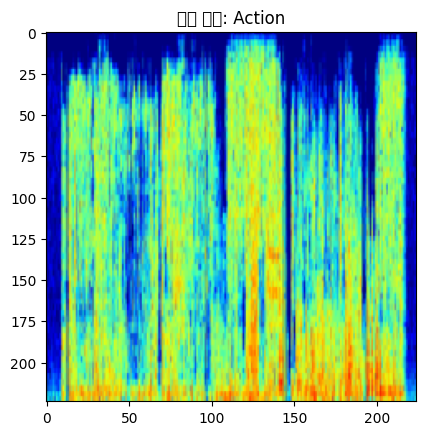

[예측 결과: Horror] (실제 정답: Action)


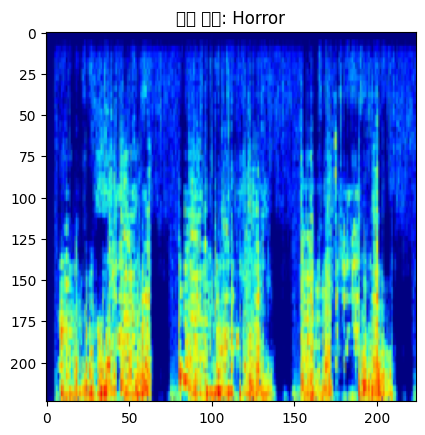

[예측 결과: Action] (실제 정답: Comedy)


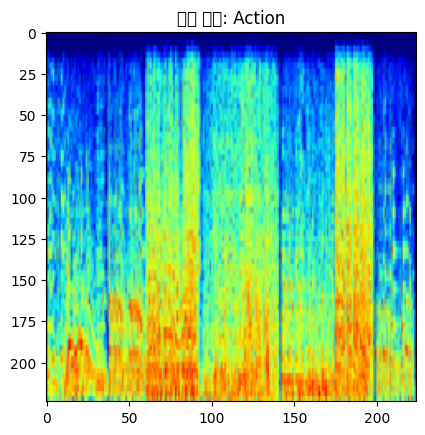

[예측 결과: Action] (실제 정답: Romance)


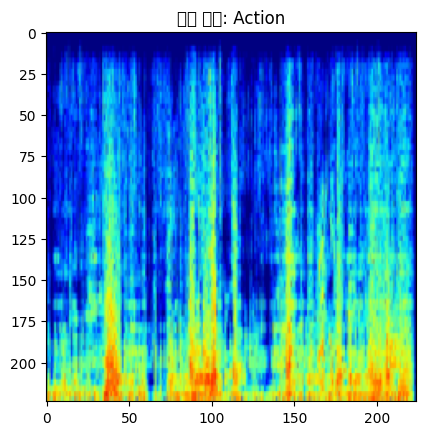

[예측 결과: Romance] (실제 정답: Drama)


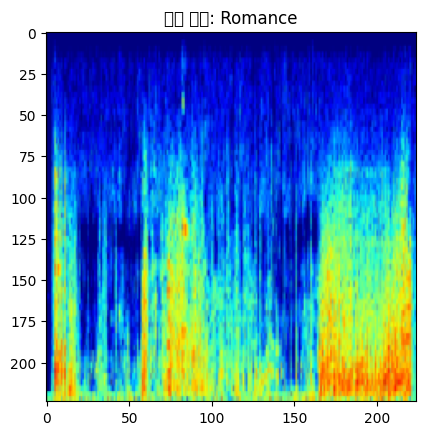

[예측 결과: Horror] (실제 정답: Horror)


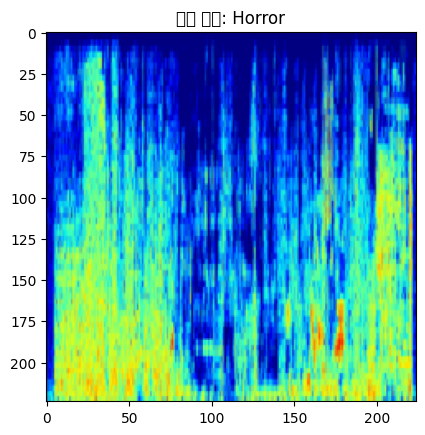

[예측 결과: Action] (실제 정답: Drama)


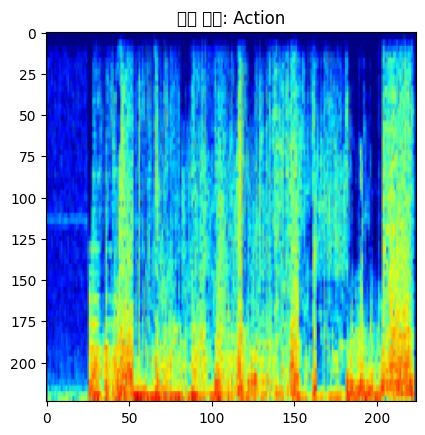

[Test Phase] Loss: 5.2882 Acc: 31.6327% Time: 12.6866s


In [7]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))